In [1]:
! pip install gcsfs


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
! pip install koreanize_matplotlib


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [4]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import os
import ast # 문자열을 리스트로 변환(출석 테이블)

# # GCS 파일 경로
# gcs_path = "gs://codeit-project/votes/accounts_timelinereport.parquet"
# # 예시: gs://codeit-project/hackle/hackle_events.parquet

# # GCP 키 경로
# key_path = "../config/key.json"

# # 데이터 불러오기
# df = pd.read_parquet(gcs_path, storage_options={"token": key_path})

# # 확인
# df.head()


In [5]:
# GCP 키 경로
key_path = "../config/key.json"

# votes/accounts_attendance 출석 테이블 

In [7]:
# GCS 파일 경로
gcs_path = "gs://codeit-project/votes/accounts_attendance.parquet"
# 데이터 불러오기
accounts_attendance_df = pd.read_parquet(gcs_path, storage_options={"token": key_path})

# 확인
display(accounts_attendance_df.head())
accounts_attendance_df.shape

,id,attendance_date_list,user_id
0,1,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1446852
1,2,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1359398
2,3,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1501542
3,4,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1507767
4,5,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1287453


(349637, 3)

In [8]:
# 유저별 출석 횟수, 첫 출석, 마지막 출석 구하기 
check_df = accounts_attendance_df.copy()

# # 문자열을 리스트로 변환
# check_df['attendance_date_list'] = check_df['attendance_date_list'].apply(ast.literal_eval)

# 출석 횟수 
check_df['attend_cnt'] = check_df['attendance_date_list'].apply(len)

# # 첫 출석일
# check_df['first_date'] = check_df['attendance_date_list'].apply(lambda x: pd.to_datetime(x[0]) if x else None)

# # 마지막 출석일
# check_df['last_date'] = check_df['attendance_date_list'].apply(lambda x: pd.to_datetime(x[-1]) if x else None)

# # 마지막 출석 - 첫 출석
# # 출석 기간 (일 수)
# check_df['attend_period_days'] = (check_df['last_date'] - check_df['first_date']).dt.days

check_df.head()

,id,attendance_date_list,user_id,attend_cnt
0,1,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1446852,182
1,2,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1359398,462
2,3,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1501542,126
3,4,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1507767,420
4,5,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1287453,434


In [9]:
check_df['attend_cnt'].describe()

count    349637.000000
mean         89.105181
std         128.136129
min           2.000000
25%          14.000000
50%          42.000000
75%         112.000000
max        4340.000000
Name: attend_cnt, dtype: float64

- 2일만 출석하고 나타나지 않은 경우 존재
- 최대 4340일 출석(약 11.9년? 12년.. 이상치!!)

# votes/accounts_blockrecord : 차단 기록 테이블

In [10]:
# GCS 파일 경로
gcs_path = "gs://codeit-project/votes/accounts_blockrecord.parquet"
# 데이터 불러오기
accounts_blockrecord_df = pd.read_parquet(gcs_path, storage_options={"token": key_path})

# 확인
display(accounts_blockrecord_df.head())
accounts_blockrecord_df.shape

,id,reason,created_at,block_user_id,user_id
0,1,그냥...,2023-05-04 23:01:53,867483,878476
1,2,친구 사이가 어색해짐,2023-05-05 01:17:08,867190,867564
2,3,나랑 관련 없는 질문을 자꾸 보냄,2023-05-05 01:50:55,875110,875261
3,6,그냥...,2023-05-05 05:21:52,883696,883511
4,7,그냥...,2023-05-05 06:40:34,871349,870177


(19482, 5)

In [11]:
accounts_blockrecord_df.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19482 entries, 0 to 19481
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19482 non-null  int64         
 1   reason         19482 non-null  object        
 2   created_at     19482 non-null  datetime64[ns]
 3   block_user_id  19482 non-null  int64         
 4   user_id        19482 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 761.1+ KB


In [12]:
accounts_blockrecord_df.describe() 

,id,created_at,block_user_id,user_id
count,19482.000000,19482,1.948200e+04,1.948200e+04
mean,12694.563495,2023-05-25 19:12:26.516579584,1.183576e+06,1.175780e+06
min,1.000000,2023-05-04 23:01:53,8.327400e+05,8.376150e+05
25%,6514.250000,2023-05-14 02:19:01,1.001336e+06,9.890410e+05
50%,12731.000000,2023-05-22 11:37:20,1.173390e+06,1.160726e+06
75%,18984.750000,2023-05-28 11:04:33,1.357468e+06,1.345758e+06
max,25361.000000,2024-05-06 13:03:37,1.582869e+06,1.583612e+06
std,7220.338199,NaN,2.049517e+05,2.043189e+05


- 2023-05-04 ~ 2024-05-06 데이터

In [13]:
accounts_blockrecord_df.duplicated().sum() # 중복값 없음

np.int64(0)

In [14]:
# 차단한 이유별 건수
accounts_blockrecord_df['reason'].value_counts()

reason
모르는 사람임               9640
친구 사이가 어색해짐           5805
사칭 계정                 2022
나랑 관련 없는 질문을 자꾸 보냄    1083
너무 많은 양의 질문을 보냄        919
기타                       7
그냥...                    6
Name: count, dtype: int64

- "모르는 사람임" 이유 1위 -> 모르는 사람인데도 차단하기 이전에 친구가 된건가??
- "친구 사이가 어색해짐" 이유 2위 -> 10대 청소년의 친구관계의 문제? 

In [15]:
# 년-월별 차단 건수 체크 
check_df = accounts_blockrecord_df.copy()
check_df['year_month'] = check_df['created_at'].dt.to_period('M')
check_df['year_month'].value_counts().sort_index()

year_month
2023-05    16442
2023-06     2262
2023-07      410
2023-08      159
2023-09      103
2023-10       11
2023-11       16
2023-12        9
2024-01        9
2024-02       12
2024-03       35
2024-04       12
2024-05        2
Freq: M, Name: count, dtype: int64

- 갈수록 차단 건수가 줄어듦
- 2023-05에 차단 건수 가장 많았음(16,442건)

# votes/accounts_failpaymenthistory : 상품 구매 실패 기록 테이블

In [48]:
# GCS 파일 경로
gcs_path = "gs://codeit-project/votes/accounts_failpaymenthistory.parquet"
# 데이터 불러오기
accounts_failpaymenthistory_df = pd.read_parquet(gcs_path, storage_options={"token": key_path})

# 확인
display(accounts_failpaymenthistory_df.head())
accounts_failpaymenthistory_df.shape

,id,productId,phone_type,created_at,user_id
0,6,heart.200,A,2023-05-14 05:49:22,1055891
1,7,heart.777,A,2023-05-14 08:17:21,1152151
2,8,heart.777,A,2023-05-14 10:11:46,986200
3,9,heart.1000,A,2023-05-14 11:53:09,1028261
4,10,heart.777,A,2023-05-14 12:30:47,1235730


(163, 5)

In [ ]:
accounts_failpaymenthistory_df.info() # procudtId 결측치 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          163 non-null    int64         
 1   productId   56 non-null     object        
 2   phone_type  163 non-null    object        
 3   created_at  163 non-null    datetime64[ns]
 4   user_id     163 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 6.5+ KB


In [52]:
accounts_failpaymenthistory_df.describe()

,id,created_at,user_id
count,163.000000,163,1.630000e+02
mean,89.828221,2023-05-27 11:32:20.828220672,1.263685e+06
min,6.000000,2023-05-14 05:49:22,8.341120e+05
25%,48.500000,2023-05-18 11:34:05,1.152704e+06
50%,89.000000,2023-05-22 08:54:33,1.273301e+06
75%,131.500000,2023-05-29 12:58:21.500000,1.398432e+06
max,174.000000,2023-09-17 09:12:53,1.575434e+06
std,48.494316,NaN,1.824636e+05


- 2023-05-27 ~ 2023-09-17 데이터

In [ ]:
accounts_failpaymenthistory_df['productId'].unique() # 상품  = 하트?  

array(['heart.200', 'heart.777', 'heart.1000', None], dtype=object)

In [ ]:
accounts_failpaymenthistory_df['phone_type'].unique() # A : 안드로이드, I : ios 추정

array(['A', 'I'], dtype=object)

In [ ]:
# 년-월별 상품 구매 실패 건수 체크 
check_df = accounts_failpaymenthistory_df.copy()
check_df['year_month'] = check_df['created_at'].dt.to_period('M')
check_df['year_month'].value_counts().sort_index()

year_month
2023-05    141
2023-06     14
2023-07      4
2023-08      2
2023-09      2
Freq: M, Name: count, dtype: int64

- 2023-05에 가장 구매 실패 기록 많음

# votes/accounts_friendrequest 친구 요청 테이블

In [54]:
# GCS 파일 경로
gcs_path = "gs://codeit-project/votes/accounts_friendrequest.parquet"
# 데이터 불러오기
accounts_friendrequest_df = pd.read_parquet(gcs_path, storage_options={"token": key_path})

# 확인
display(accounts_friendrequest_df.head())
accounts_friendrequest_df.shape

,id,status,created_at,updated_at,receive_user_id,send_user_id
0,7,P,2023-04-17 18:29:11,2023-04-17 18:29:11,831962,837521
1,10,A,2023-04-17 18:29:11,2023-04-22 06:02:53,832151,837521
2,11,A,2023-04-17 18:29:11,2023-04-18 19:28:41,832340,837521
3,13,A,2023-04-17 18:29:11,2023-04-19 11:05:04,833041,837521
4,20,P,2023-04-17 18:29:11,2023-04-17 18:29:11,834415,837521


(17147175, 6)

In [ ]:
# 진행중

# votes/accounts_timelinereport : 유저 신고기록 테이블

In [16]:
# GCS 파일 경로
gcs_path = "gs://codeit-project/votes/accounts_timelinereport.parquet"
# 데이터 불러오기
accounts_timelinereport_df = pd.read_parquet(gcs_path, storage_options={"token": key_path})

# 확인
display(accounts_timelinereport_df.head())
accounts_timelinereport_df.shape

,id,reason,created_at,reported_user_id,user_id,user_question_record_id
0,28,타인을 사칭함,2023-05-06 04:44:57,874587,885082,3920588
1,37,친구를 비하하거나 조롱하는 어투,2023-05-06 05:41:19,881048,881298,4018679
2,46,친구를 비하하거나 조롱하는 어투,2023-05-06 06:26:59,887882,881945,4120914
3,64,허위 사실 언급,2023-05-06 07:07:46,888610,893684,4143049
4,65,허위 사실 언급,2023-05-06 07:07:52,888610,893684,4143049


(208, 6)

In [17]:
accounts_timelinereport_df.info() # 결측치 없음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       208 non-null    int64         
 1   reason                   208 non-null    object        
 2   created_at               208 non-null    datetime64[ns]
 3   reported_user_id         208 non-null    int64         
 4   user_id                  208 non-null    int64         
 5   user_question_record_id  208 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 9.9+ KB


In [18]:
accounts_timelinereport_df.describe()

,id,created_at,reported_user_id,user_id,user_question_record_id
count,208.000000,208,2.080000e+02,2.080000e+02,2.080000e+02
mean,9786.269231,2023-05-15 08:13:50.278846208,1.132497e+06,1.159946e+06,4.932558e+07
min,28.000000,2023-05-06 04:44:57,8.372350e+05,8.340890e+05,3.920588e+06
25%,6123.750000,2023-05-11 16:41:43.500000,9.664702e+05,9.671202e+05,2.461178e+07
50%,10095.000000,2023-05-15 01:23:29,1.144432e+06,1.184397e+06,4.740327e+07
75%,14182.250000,2023-05-18 18:01:18,1.225963e+06,1.291813e+06,7.179578e+07
max,23108.000000,2023-06-02 08:30:06,1.562736e+06,1.548002e+06,1.407659e+08
std,5713.767759,NaN,1.694121e+05,1.800959e+05,3.311281e+07


- 2023-05-15 ~ 2023-06-02 데이터 

In [19]:
# 유저별 신고된 개수
accounts_timelinereport_df['reported_user_id'].value_counts().sort_values(ascending = False)

reported_user_id
1138757    15
1156031     8
1187305     7
939196      7
885129      6
           ..
916592      1
1479146     1
840685      1
1448785     1
1562736     1
Name: count, Length: 125, dtype: int64

In [20]:
# 많이 신고된 유저 경우 탐색  top3
print(accounts_timelinereport_df[accounts_timelinereport_df['reported_user_id'] == 1138757]['reason'].value_counts())
print("------------------------")
print(accounts_timelinereport_df[accounts_timelinereport_df['reported_user_id'] == 1156031]['reason'].value_counts())
print("------------------------")
print(accounts_timelinereport_df[accounts_timelinereport_df['reported_user_id'] == 1187305]['reason'].value_counts())
print("------------------------")
print(accounts_timelinereport_df[accounts_timelinereport_df['reported_user_id'] == 939196]['reason'].value_counts())
print("------------------------")
print(accounts_timelinereport_df[accounts_timelinereport_df['reported_user_id'] == 885129]['reason'].value_counts())

reason
친구를 비하하거나 조롱하는 어투    15
Name: count, dtype: int64
------------------------
reason
선정적이거나 폭력적인 내용    7
허위 사실 언급          1
Name: count, dtype: int64
------------------------
reason
친구를 비하하거나 조롱하는 어투    3
선정적이거나 폭력적인 내용       2
허위 사실 언급             1
타인을 사칭함              1
Name: count, dtype: int64
------------------------
reason
허위 사실 언급    4
타인을 사칭함     3
Name: count, dtype: int64
------------------------
reason
허위 사실 언급             3
친구를 비하하거나 조롱하는 어투    1
타인을 사칭함              1
선정적이거나 폭력적인 내용       1
Name: count, dtype: int64


In [21]:
# 신고된 이유 별 개수
accounts_timelinereport_df['reason'].value_counts().sort_values(ascending = False)

reason
허위 사실 언급             80
친구를 비하하거나 조롱하는 어투    64
선정적이거나 폭력적인 내용       39
타인을 사칭함              15
광고                   10
Name: count, dtype: int64

In [22]:
# 년-월별 차단 건수 체크 
## 당연함!!! 23년 5월 데이터가 대부분임 애초에...;; 
check_df = accounts_timelinereport_df.copy()
check_df['year_month'] = check_df['created_at'].dt.to_period('M')
check_df['year_month'].value_counts().sort_index()

year_month
2023-05    206
2023-06      2
Freq: M, Name: count, dtype: int64

# votes/accounts_user : 유저 테이블

| columns            | explain                                     |
|--------------------|---------------------------------------------|
| is_superuser       | superuser인지 여부                          |
| is_staff           | staff인지 여부                              |
| firebase_uid       | 과거 firebase 세션관리 할때 사용하는 식별자 |
| gender             | 성별                                        |
| point              | 포인트                                      |
| friend_id_list     | 친구 id 데이터                              |
| is_push_on         | 푸시 on/off                                 |
| block_user_id_list | 차단한 유저 id 데이터                       |
| hide_user_id_list  | 숨김 처리한 유저 id 데이터                  |
| ban_status         | 차단 혹은 탈퇴한 유저인지 타입              |
| report_count       | 신고 당한 횟수                              |
| alarm_count        | 알람 갯수                                   |
| pending_chat       | 안 읽은 채팅 갯수                           |
| pending_votes      | 확인 안한 투표 갯수                         |
| group_id           | 학급 id                                     |
| created_at         | 만든 시간                                   |

In [23]:
# GCS 파일 경로
gcs_path = "gs://codeit-project/votes/accounts_user.parquet"
# 데이터 불러오기
accounts_user_df = pd.read_parquet(gcs_path, storage_options={"token": key_path})

# 확인
display(accounts_user_df.head())
accounts_user_df.shape

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0


(677085, 16)

In [24]:
accounts_user_df.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677085 entries, 0 to 677084
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  677085 non-null  int64         
 1   is_superuser        677085 non-null  int64         
 2   is_staff            677085 non-null  int64         
 3   gender              677083 non-null  object        
 4   point               677085 non-null  int64         
 5   friend_id_list      677085 non-null  object        
 6   is_push_on          677085 non-null  int64         
 7   created_at          677085 non-null  datetime64[ns]
 8   block_user_id_list  677085 non-null  object        
 9   hide_user_id_list   677085 non-null  object        
 10  ban_status          677085 non-null  object        
 11  report_count        677085 non-null  int64         
 12  alarm_count         677085 non-null  int64         
 13  pending_chat        677085 no

In [25]:
accounts_user_df.describe()

,id,is_superuser,is_staff,point,is_push_on,created_at,report_count,alarm_count,pending_chat,pending_votes,group_id
count,6.770850e+05,677085.000000,677085.000000,6.770850e+05,677085.000000,677085,677085.000000,677085.000000,677085.000000,677085.000000,677082.000000
mean,1.212969e+06,0.000003,0.000004,3.039145e+03,0.843098,2023-05-15 22:46:01.709213440,0.037291,0.946646,0.098469,84.630518,37022.980168
min,8.319560e+05,0.000000,0.000000,0.000000e+00,0.000000,2023-03-29 03:44:14.047130,0.000000,0.000000,-1.000000,0.000000,1.000000
25%,1.028075e+06,0.000000,0.000000,4.000000e+02,1.000000,2023-05-09 01:35:23.126586880,0.000000,0.000000,0.000000,2.000000,18488.000000
50%,1.211729e+06,0.000000,0.000000,9.650000e+02,1.000000,2023-05-13 10:50:57.476214016,0.000000,1.000000,0.000000,29.000000,35614.000000
75%,1.397906e+06,0.000000,0.000000,2.183000e+03,1.000000,2023-05-20 07:49:47.800349952,0.000000,1.000000,0.000000,122.000000,54534.000000
max,1.583733e+06,1.000000,1.000000,8.850000e+08,1.000000,2024-05-09 08:31:17.710824,253.000000,40878.000000,5712.000000,3352.000000,84546.000000
std,2.138971e+05,0.001719,0.002105,1.076020e+06,0.363709,NaN,0.588105,56.114858,11.087769,123.262688,21997.765398


- point : 평균 3039 포인트 보유, 최고 885000~~ 보유 
- is_push_on : 푸시메시지 on 인 경우가 더 많음
- created_at : 2023-05-15 ~ 2024-05-09 데이터
- report_count : 신고당한 횟수 대부분 0 이지만, 최고 253 존재
- alarm_count : 알람 갯수 대부분 0 ~ 1 이지만, 최고 40878
- pending_chat : 안 읽은 채팅 갯수 대부분 없지만 최고 5712
- pending_votes :  확인 안한 투표 갯수 0 ~ 122 사이에 75% 존재, 최고 3352 


In [26]:
accounts_user_df.describe(include = 'O')

,gender,friend_id_list,block_user_id_list,hide_user_id_list,ban_status
count,677083,677085,677085,677085,677085
unique,2,674117,11685,74995,4
top,F,[],[],[],N
freq,396665,2874,664042,598352,668432


In [27]:
accounts_user_df['ban_status'].unique()

array(['N', 'NB', 'W', 'RB'], dtype=object)

- gender : F 여학생이 더 많음
- ban_status : 차단 혹은 탈퇴한 유저인지 타입 4개로 구분 (N, NB, W, RB) -> 무슨 뜻?

In [28]:
# 학급별 유저수 
accounts_user_df['group_id'].value_counts()

group_id
67097.0    80
6431.0     79
13705.0    73
53560.0    69
36957.0    61
           ..
84542.0     1
84541.0     1
84539.0     1
84538.0     1
84537.0     1
Name: count, Length: 80912, dtype: int64

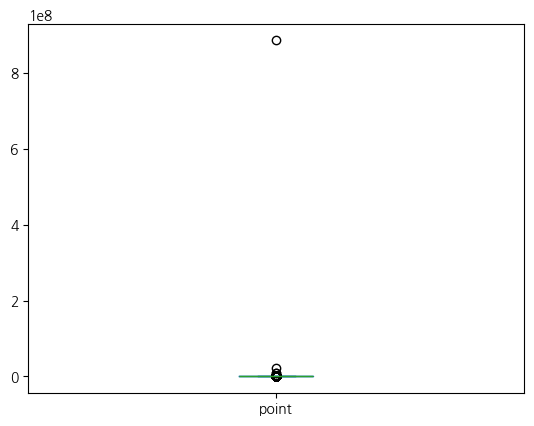

In [29]:
# 유저별 포인트  boxplot 
accounts_user_df['point'].plot(kind = 'box')
plt.show()

In [30]:
accounts_user_df[accounts_user_df['point'] > 800000000]

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
12,833041,0,0,F,885000006,"[841345, 982531, 838785, 882567, 832520, 87949...",1,2023-03-31 14:32:36.425315,[],[],N,1,8,0,0,149.0


- 포인트가 비정상적으로 많음
- 23년 3월 31일 가입

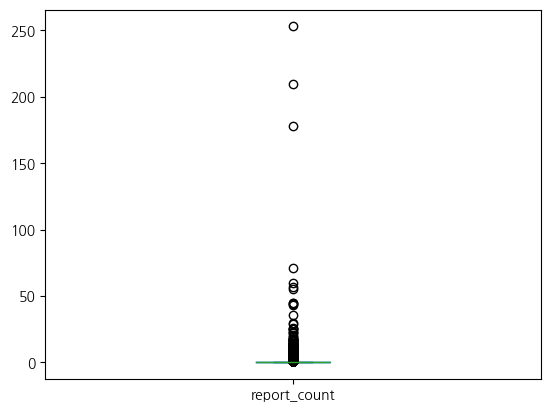

In [31]:
# 유저별 신고당한 횟수 boxplot 
accounts_user_df['report_count'].plot(kind = 'box')
plt.show()

In [32]:
# boxplot 기준 극단 이상치 확인 
accounts_user_df[accounts_user_df['report_count'] > 150]

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
50,834358,0,0,F,600426,"[841345, 982531, 832520, 838541, 846223, 83304...",1,2023-04-03 10:37:13.518521,[],[869100],N,210,912,5712,28,1.0
693,838541,0,0,F,100404,"[841345, 982531, 843015, 879496, 832520, 84429...",1,2023-04-19 16:36:39.906965,[],[],N,178,21442,4105,28,9.0


In [33]:
# 유저 테이블에서 신고당한 횟수 상위인 id가 유저 신고 기록테이블(23/5/15 ~ 23/6/2)에서는 데이터 없음 ! 기간 안맞는 문제!
accounts_timelinereport_df[accounts_timelinereport_df['reported_user_id'] == 838541]['reason'].value_counts()

Series([], Name: count, dtype: int64)

In [34]:
# iqr 기반 이상치 확인 
q3 = accounts_user_df['report_count'].quantile(0.75)
q1 = accounts_user_df['report_count'].quantile(0.25)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

#accounts_user_df[(accounts_user_df['report_count'] < lower) | (accounts_user_df['report_count'] > upper)]

In [35]:
# accounts_timelinereport_df; 유저 신고기록 테이블의 상위권 유저 탐색
target_user_list = [1138757, 1156031, 1187305, 939196, 885129]
accounts_user_df[accounts_user_df['id'].isin(target_user_list)]
      

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
37452,885129,0,0,M,698,"[883202, 883588, 885126, 888713, 883466, 90164...",0,2023-05-05 09:36:19.992098,[],[],N,6,0,0,33,12003.0
86960,939196,0,0,F,197,"[1051136, 1075719, 941581, 1058325, 1078814, 9...",1,2023-05-07 03:27:22.213022,[],[984978],N,7,0,0,536,21950.0
271434,1138757,0,0,F,1180,"[942080, 1158160, 1278994, 1136147, 1382424, 1...",1,2023-05-11 13:56:56.032360,[],[],N,15,1,0,122,24762.0
287357,1156031,0,0,M,917,"[1142661, 1156233, 1155992, 1175705, 1154585, ...",1,2023-05-12 02:52:55.364976,[],[],N,10,1,0,445,7399.0
316083,1187305,0,0,M,2598,"[1185408, 1180034, 1209858, 1006085, 1192968, ...",1,2023-05-12 15:57:28.105461,[],[],N,7,0,0,52,33241.0


# votes/accounts_userwithdraw : 탈퇴 기록 테이블

In [36]:
# GCS 파일 경로
gcs_path = "gs://codeit-project/votes/accounts_userwithdraw.parquet"
# 데이터 불러오기
accounts_userwithdraw_df = pd.read_parquet(gcs_path, storage_options={"token": key_path})

# 확인
display(accounts_userwithdraw_df.head())
accounts_userwithdraw_df.shape

,id,reason,created_at
0,42,재밌는 질문이 없어서,2023-03-29 13:22:12
1,43,함께 할 친구가 없어서,2023-03-29 13:24:59
2,44,함께 할 친구가 없어서,2023-03-29 13:53:32
3,45,함께 할 친구가 없어서,2023-03-29 13:54:03
4,46,재밌는 질문이 없어서,2023-03-30 00:31:19


(70764, 3)

In [37]:
accounts_userwithdraw_df.info() # 결측치 없음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70764 entries, 0 to 70763
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          70764 non-null  int64         
 1   reason      70764 non-null  object        
 2   created_at  70764 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ MB


In [38]:
accounts_userwithdraw_df.describe()

,id,created_at
count,70764.000000,70764
mean,35499.063154,2023-06-12 06:34:26.762464
min,42.000000,2023-03-29 13:22:12
25%,17803.750000,2023-05-12 06:28:54.249999872
50%,35498.500000,2023-05-20 15:50:53.500000
75%,53199.250000,2023-06-14 12:13:03.500000
max,70893.000000,2024-05-09 08:49:06
std,20439.604727,NaN


- 2023-03-29 ~ 2024-05-29 데이터 

In [39]:
# 년-월별 탈퇴 건수 체크 
check_df = accounts_userwithdraw_df.copy()
check_df['year_month'] = check_df['created_at'].dt.to_period('M')
check_df['year_month'].value_counts().sort_index()

year_month
2023-03       17
2023-04     2397
2023-05    44845
2023-06     9642
2023-07     4811
2023-08     2310
2023-09     2450
2023-10     1164
2023-11      837
2023-12      693
2024-01      697
2024-02      319
2024-03      250
2024-04      240
2024-05       92
Freq: M, Name: count, dtype: int64

- 2023-05는 신고기록도 많고, 차단 건수도 1위, 상품 구매 실패도 1위 (신고 기록도 많긴 한데, 애초에 데이터에 있는 기간이 23-05가 많이 차지함)


In [40]:
accounts_userwithdraw_df['reason'].value_counts()

reason
기타 이유           40301
함께 할 친구가 없어서    14450
재밌는 질문이 없어서     13133
버그가 너무 많아서       2031
구독료가 너무 비싸서       730
admin              61
test               53
기타                  5
Name: count, dtype: int64

- 기타 이유를 제외하고는 '함께 할 친구가 없어서', '재밌는 질문이 없어서'가 상위를 차지함
- 그 다음에 '버그가 너무 많아서' 이유가 존재!!! -> 서비스 운영 상의 문제 

# votes/polls_question : 질문 데이터 테이블

In [41]:
# GCS 파일 경로
gcs_path = "gs://codeit-project/votes/polls_question.parquet"
# 데이터 불러오기
polls_question_df = pd.read_parquet(gcs_path, storage_options={"token": key_path})

# 확인
display(polls_question_df.head())
polls_question_df.shape

,id,question_text,created_at
0,99,가장 신비한 매력이 있는 사람은?,2023-03-31 15:22:53
1,100,"""이 사람으로 한 번 살아보고 싶다"" 하는 사람은?",2023-03-31 15:22:53
2,101,미래의 틱톡커는?,2023-03-31 15:22:54
3,102,여기서 제일 특이한 친구는?,2023-03-31 15:22:54
4,103,가장 지켜주고 싶은 사람은?,2023-03-31 15:22:55


(5025, 3)

In [42]:
polls_question_df.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             5025 non-null   int64         
 1   question_text  5025 non-null   object        
 2   created_at     5025 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 117.9+ KB


In [43]:
polls_question_df.describe()

,id,created_at
count,5025.000000,5025
mean,2619.897512,2023-05-26 17:49:11.666268672
min,99.000000,2023-03-31 15:22:53
25%,1365.000000,2023-05-15 14:03:03
50%,2621.000000,2023-06-02 08:06:53
75%,3877.000000,2023-06-06 06:10:14
max,5133.000000,2023-06-06 06:15:52
std,1452.438472,NaN


- 2023-03-31 ~ 2023-06-06 데이터

In [44]:
polls_question_df['question_text'].value_counts()

question_text
vote                            56
눈이 제일 큰 사람은?                     3
지금 뭐하는지 궁금한 친구                   3
인생 2회차인 것 같은 사람은?                3
2세가 가장 귀여울 것 같은 사람은?             3
                                ..
조용한 매력이 있는 친구                    1
샤워 1시간 동안 할 것 같은 사람은?            1
시간 약속을 제일 잘 지킬것 같은 사람은?          1
너에게 칭찬을 받는다면 가장 기분 좋을 것 같아!      1
사달라는거 다 사줄 것 같은 사람은?             1
Name: count, Length: 3903, dtype: int64

In [45]:
# 년-월별 질문 건수 체크 
check_df = polls_question_df.copy()
check_df['year_month'] = check_df['created_at'].dt.to_period('M')
check_df['year_month'].value_counts().sort_index()

year_month
2023-03      73
2023-04     154
2023-05    1309
2023-06    3489
Freq: M, Name: count, dtype: int64

- 갈수록 질문 건수 많아짐

# votes/polls_questionreport : 질문에 대한 신고기록 테이블

In [55]:
# GCS 파일 경로
gcs_path = "gs://codeit-project/votes/polls_questionreport.parquet"
# 데이터 불러오기
polls_questionreport_df = pd.read_parquet(gcs_path, storage_options={"token": key_path})

# 확인
display(polls_questionreport_df.head())
polls_questionreport_df.shape

,id,reason,created_at,question_id,user_id
0,1,이 질문은 재미없어요,2023-04-19 06:20:35,250,837556
1,2,이 질문은 재미없어요,2023-04-19 06:58:09,113,837672
2,3,불쾌한 내용이 포함되어 있음,2023-04-19 06:58:17,113,837672
3,4,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:42,119,837922
4,5,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:50,119,837922


(51424, 5)

In [ ]:
polls_questionreport_df.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51424 entries, 0 to 51423
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           51424 non-null  int64         
 1   reason       51424 non-null  object        
 2   created_at   51424 non-null  datetime64[ns]
 3   question_id  51424 non-null  int64         
 4   user_id      51424 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.0+ MB


In [57]:
polls_questionreport_df.describe()

,id,created_at,question_id,user_id
count,51424.000000,51424,51424.000000,5.142400e+04
mean,28027.358587,2023-05-21 22:12:41.641120768,733.099098,1.168247e+06
min,1.000000,2023-04-19 06:20:35,99.000000,8.323400e+05
25%,14020.750000,2023-05-13 01:36:21.249999872,305.000000,9.784810e+05
50%,28047.500000,2023-05-18 14:33:45,494.000000,1.160251e+06
75%,42084.250000,2023-05-26 08:45:25,1021.000000,1.351295e+06
max,55767.000000,2024-05-05 14:56:25,5110.000000,1.583634e+06
std,16163.108294,NaN,666.021729,2.082471e+05


- 2023-05-21 ~ 2024-05-05 데이터 

In [58]:
polls_questionreport_df['reason'].value_counts()

reason
그냥 싫어                   28446
나랑 맞지 않는 질문인 것 같음        9541
불쾌한 질문 내용                5386
자꾸 같은 내용의 질문 반복          3202
어떻게 이런 생각을? 이 질문 최고!     1821
한 친구가 질문을 반복적으로 보냄       1701
기타                        480
이 질문은 재미없어요               471
불쾌한 내용이 포함되어 있음           250
오타가 있음                     68
선정적이거나 자극적인 질문             58
Name: count, dtype: int64

- 그냥 싫어 가 1위..? 
- 불쾌한 내용, 같은 내용 반복 등의 이유도 상위권

# hackle/hackle_events.parquet 이벤트 로그 데이터